<a href="https://colab.research.google.com/github/Pedadabhargavi/facial_emotion_detection/blob/main/cnn_main_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
print(os.listdir("/content/drive/MyDrive/student_emotion/"))

['fer2013.csv']


In [ ]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
filname = '/content/drive/MyDrive/student_emotion/fer2013.csv'
label_map = ['Anger', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
names=['emotion','pixels','usage']
df=pd.read_csv('/content/drive/MyDrive/student_emotion/fer2013.csv',names=names, na_filter=False)
im=df['pixels']
df.head(10)

,emotion,pixels,usage
0,emotion,pixels,Usage
1,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
2,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
3,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
4,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
5,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
6,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
7,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
8,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
9,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training


In [ ]:
def getData(filname):
    # images are 48x48
    # N = 35887
    Y = []
    X = []
    first = True
    for line in open(filname):
        if first:
            first = False
        else:
            row = line.split(',')
            Y.append(int(row[0]))
            X.append([int(p) for p in row[1].split()])

    X, Y = np.array(X) / 255.0, np.array(Y)
    return X, Y

In [ ]:
X, Y = getData(filname)
num_class = len(set(Y))
print(num_class)

7


In [ ]:
N, D = X.shape
X = X.reshape(N, 48, 48, 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)
y_train = (np.arange(num_class) == y_train[:, None]).astype(np.float32)
y_test = (np.arange(num_class) == y_test[:, None]).astype(np.float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range = 10,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode = 'nearest')
testgen = ImageDataGenerator(rescale=1./255)
datagen.fit(X_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

In [ ]:
def my_model1():
    model1 = Sequential()
    input_shape = (48,48,1)
    model1.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model1.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D(pool_size=(2, 2)))

    model1.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model1.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D(pool_size=(2, 2)))

    model1.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model1.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model1.add(BatchNormalization())
    model1.add(MaxPooling2D(pool_size=(2, 2)))
    model1.add(Flatten())
    model1.add(Dense(128))
    model1.add(BatchNormalization())
    model1.add(Activation('relu'))
    model1.add(Dropout(0.2))
    model1.add(Dense(7))
    model1.add(Activation('softmax'))

    model1.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model1
model1=my_model1()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       204928    
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 128)       4

In [ ]:
model1=my_model1()
opt = Adam(lr=0.0001, decay=1e-3)
model1.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
h=model1.fit(x=X_train,
            y=y_train,
            batch_size=64,
            epochs=10,
            verbose=1,
            validation_data=(X_test,y_test),
            shuffle=True
            )

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
505/505 [==============================] - 29s 38ms/step - loss: 1.7404 - accuracy: 0.3545 - val_loss: 1.7453 - val_accuracy: 0.3371
Epoch 2/10
505/505 [==============================] - 18s 36ms/step - loss: 1.3982 - accuracy: 0.4750 - val_loss: 1.3884 - val_accuracy: 0.4712
Epoch 3/10
505/505 [==============================] - 18s 36ms/step - loss: 1.2006 - accuracy: 0.5504 - val_loss: 1.3865 - val_accuracy: 0.4893
Epoch 4/10
505/505 [==============================] - 18s 36ms/step - loss: 1.0357 - accuracy: 0.6203 - val_loss: 1.2122 - val_accuracy: 0.5478
Epoch 5/10
505/505 [==============================] - 18s 36ms/step - loss: 0.8819 - accuracy: 0.6904 - val_loss: 1.2033 - val_accuracy: 0.5648
Epoch 6/10
505/505 [==============================] - 19s 37ms/step - loss: 0.7407 - accuracy: 0.7524 - val_loss: 1.1903 - val_accuracy: 0.5751
Epoch 7/10
505/505 [==============================] - 18s 36ms/step - loss: 0.6155 - accuracy: 0.8114 - val_loss: 1.1962 - val_accuracy:

In [ ]:
model1.save('/content/drive/MyDrive/image/model1.h5')

In [ ]:
img='/content/drive/MyDrive/image/PrivateTest_218533.jpg'

In [ ]:
objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
y_pos = np.arange(len(objects))
print(y_pos)

[0 1 2 3 4 5 6]


In [ ]:
def emotion_analysis(emotions):
    objects = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
    y_pos = np.arange(len(objects))
    plt.bar(y_pos, emotions, align='center', alpha=0.9)
    plt.tick_params(axis='x', which='both', pad=10,width=4,length=10)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

plt.show()

In [ ]:
y_pred=model1.predict(X_test)
y_test.shape

113/113 [==============================] - 1s 6ms/step


(3589, 7)

/usr/local/lib/python3.8/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


1/1 [==============================] - 0s 160ms/step


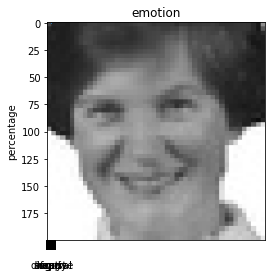

Expression Prediction: happy


In [ ]:
import tensorflow
from skimage import io
from tensorflow.keras.utils import load_img
img = load_img('/content/drive/MyDrive/image/PrivateTest_218533.jpg', grayscale=True, target_size=(48, 48))
show_img=load_img('/content/drive/MyDrive/image/PrivateTest_218533.jpg', grayscale=False, target_size=(200, 200))
x = tensorflow.keras.utils.img_to_array(img)
x = np.expand_dims(x, axis = 0)

x /= 255

custom = model1.predict(x)
#print(custom[0])
emotion_analysis(custom[0])

x = np.array(x, 'float32')
x = x.reshape([48, 48]);

plt.gray()
plt.imshow(show_img)
plt.show()
m=0.000000000000000000001
a=custom[0]
for i in range(0,len(a)):
    if a[i]>m:
        m=a[i]
        ind=i

print('Expression Prediction:',objects[ind])